In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Энтропия по Шеннону

![](https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png)

In [ ]:
import math

def entropy(arr):
    probs = [arr.count(i)/len(arr) for i in list(set(arr))]
    return sum([-math.log(i, 2)*i for i in probs])

a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

entropy(a)

0.9927744539878084

In [ ]:
entropy(a[13:])

0.5916727785823275

In [ ]:
entropy(a[:13])

0.961236604722876

![](https://habrastorage.org/r/w1560/storage2/785/21c/7c6/78521c7c61114d0c433d76cb4f282f15.png)

In [ ]:
a = [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
entr = entropy(a)

igs = []
appending = []
for i in range(1, len(a)):
    arr1 = a[:i]
    arr2 = a[i:]
    print('split by x<=', i)
    appending.append('split by x<='+ str(i))
    print('entropies:', entropy(arr1), entropy(arr2))
    print('ig =', entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    igs.append(entr - (len(arr1)/len(a))*entropy(arr1) - (len(arr2)/len(a))*entropy(arr2))
    print('---------------------')

split by x<= 1
entropies: 0.0 0.9980008838722996
ig = 0.044673614309123866
---------------------
split by x<= 2
entropies: 1.0 0.9910760598382222
ig = 0.0008060001334083688
---------------------
split by x<= 3
entropies: 0.9182958340544896 0.9774178175281716
ig = 0.024224933980689145
---------------------
split by x<= 4
entropies: 0.8112781244591328 0.9544340029249649
ig = 0.06697162675600987
---------------------
split by x<= 5
entropies: 0.7219280948873623 0.9182958340544896
ig = 0.12357055472510059
---------------------
split by x<= 6
entropies: 0.9182958340544896 0.9402859586706309
ig = 0.05908553270201988
---------------------
split by x<= 7
entropies: 0.9852281360342516 0.961236604722876
ig = 0.023140813305950858
---------------------
split by x<= 8
entropies: 1.0 0.9798687566511527
ig = 0.004853199997116753
---------------------
split by x<= 9
entropies: 0.9910760598382222 0.9940302114769565
ig = 7.361074828227121e-05
---------------------
split by x<= 10
entropies: 1.0 0.970950

## Минимизация энтропии

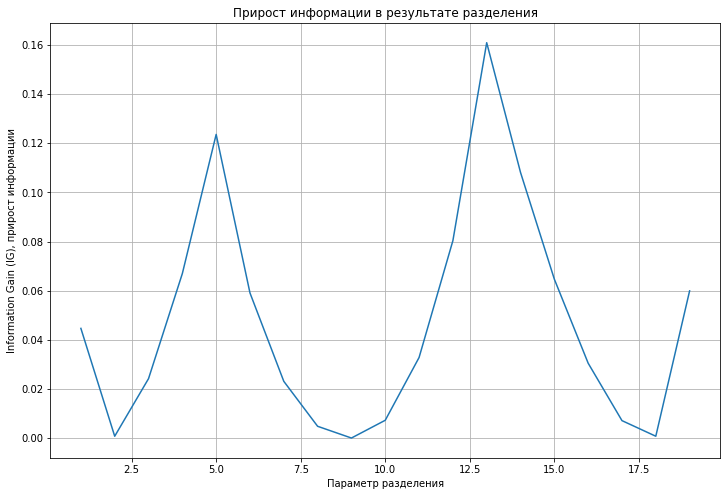

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot([i for i in range(1, 20)], igs)
ax.set_title('Прирост информации в результате разделения')
ax.set_ylabel('Information Gain (IG), прирост информации')
ax.set_xlabel(r'Параметр разделения')
ax.grid(True)
plt.show()

# Релазиация целого дерева

In [ ]:
# на основе https://habr.com/ru/company/mailru/blog/438560/
from sklearn.metrics import mean_squared_error

class RegressionTree():

    '''
    Класс RegressionTree решает задачу регрессии. Основан на рекурсивных
    вызовах, когда прописываются условия выхода из рекурсии.
    '''

    def __init__(self, max_depth=3, n_epoch=10, min_size=8):

        '''
        Объявляем переменные класса.
        '''

        self.max_depth = max_depth # максимальная глубина
        self.min_size = min_size # минимальный размер поддерева
        self.value = 0 # значение в поддереве (среднее по всем листьям)
        self.feature_idx = -1 # номер лучшего признака
        self.feature_threshold = 0 # значение лучшего признака
        self.left = None # левый потомок
        self.right = None # правый потомок

    def fit(self, X, y):

        '''
        Процедура обучения дерева. На выходе получим обученную модель.
        '''

        # инициализируем начальные значения
        self.value = y.mean()
        base_error = ((y - self.value) ** 2).sum()
        error = base_error
        flag = 0

        # ошибки в левом и правом поддереве
        prev_error_left = base_error
        prev_error_right = 0

        # если дошли до глубины 0 - выходим
        if self.max_depth <= 1:
            return

        dim_shape = X.shape[1]

        # значения в левом и правом поддереве
        left_value = 0
        right_value = 0

        # начинаем цикл по признакам
        for feat in range(dim_shape):

            # сортируем признаки
            idxs = np.argsort(X[:, feat])

            # количество сэмплов в левом и правом поддереве
            N = X.shape[0]
            N1, N2 = N, 0
            thres = 1

            # начинаем проходиться по значениям признака
            while thres < N - 1:
                N1 -= 1
                N2 += 1

                idx = idxs[thres]
                x = X[idx, feat]

                # пропускаем одинаковые признаки
                if thres < N - 1 and x == X[idxs[thres + 1], feat]:

                    thres += 1
                    continue

                # данные, которые получаются у нас в результате такого сплита
                target_right = y[idxs][:thres]
                target_left = y[idxs][thres:]
                mean_right = y[idxs][:thres].mean(),
                mean_left = y[idxs][thres:].mean()

                # на этом шаге уже нужно считать ошибку -
                # генерируем предикты (среднее в потомках)
                left_shape = target_left.shape[0]
                right_shape = target_right.shape[0]
                mean_left_array = [mean_left for _ in range(left_shape)]
                mean_right_array = [mean_right for _ in range(right_shape)]

                # считаем ошибку слева и справа
                prev_error_left = N1/N * mean_squared_error(target_left, mean_left_array)
                prev_error_right = N2/N * mean_squared_error(target_right, mean_right_array)

                # если выполняются условия сплита, то обновляем
                if (prev_error_left + prev_error_right < error):
                    if (min(N1,N2) > self.min_size):
                        self.feature_idx = feat
                        self.feature_threshold = x
                        left_value = mean_left
                        right_value = mean_right

                        flag = 1
                        error = prev_error_left + prev_error_right

                thres += 1

        # если не нашли лучший сплит, выходим
        if self.feature_idx == -1:
            return

        # дошли сюда - есть хорошее разбиение, нужно обучать дальше
        # инициализируем потомков - те же деревья решений
        self.left = RegressionTree(self.max_depth - 1)
        self.left.value = left_value
        self.right = RegressionTree(self.max_depth - 1)
        self.right.value = right_value

        # индексы потомков
        idxs_l = (X[:, self.feature_idx] > self.feature_threshold)
        idxs_r = (X[:, self.feature_idx] <= self.feature_threshold)

        # обучаем
        self.left.fit(X[idxs_l, :], y[idxs_l])
        self.right.fit(X[idxs_r, :], y[idxs_r])

    def __predict(self, x):

        '''
        Функция для генерирования предсказания - смотрим узлы, идем
        в соответствующих  потомков и смотрим в конце self.value - это
        и будет ответом.
        '''

        if self.feature_idx == -1:
            return self.value

        if x[self.feature_idx] > self.feature_threshold:
            return self.left.__predict(x)
        else:
            return self.right.__predict(x)

    def predict(self, X):

        '''
        Предикт для матрицы - просто для каждой строчки вызываем __predict().
        '''

        y = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            y[i] = self.__predict(X[i])

        return y

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

data = datasets.fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['price'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
%%time
A = RegressionTree(2) # это наш алгоритм
A.fit(X_train, y_train)

CPU times: user 9min 57s, sys: 1.68 s, total: 9min 58s
Wall time: 10min 1s


In [ ]:
preds = A.predict(X_test)
preds

array([1.74450374, 1.74450374, 1.74450374, ..., 1.74450374, 3.35601725,
       3.35601725])

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, preds)

0.2886017442563197

In [ ]:
%%time
model = DecisionTreeRegressor(max_depth=2)
 # из Sklearn
model.fit(X_train, y_train)

CPU times: user 31.1 ms, sys: 635 µs, total: 31.7 ms
Wall time: 39.3 ms


DecisionTreeRegressor(max_depth=2)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test))

0.4386516172449805

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, len(X_train[0])-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train, y_train)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


({'max_depth': 9, 'max_features': 7, 'min_samples_split': 9},
 0.6940507445857094)

In [ ]:
# по умолчанию grid search refit-ит лучшую модель для predict
r2_score(y_test, gs.predict(X_test))

0.6734661649453952

# Коробочные реализации на более реальных данных

Данные:

https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

## EDA

In [ ]:
import os

data = []
for file_ in os.listdir('./data'):
    df = pd.read_csv('./data/' + file_)
    data.append(df)

df = pd.concat(data, axis=0)
df.to_csv('./results.csv', index=False)

In [ ]:
# df = pd.read_csv('https://dl.uploadgram.me/6081b6b3d5d36h?raw').drop(columns=['Unnamed: 0'])
df = pd.read_csv('results.csv')
df

<ipython-input-4-3bbaff1b7a5a>:2: DtypeWarning: Columns (2,4,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results.csv')


,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg,tax(£),fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,8000,Manual,38852,Petrol,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Focus,2019.0,13400,Manual,11952,Petrol,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Focus,2019.0,14600,Manual,22142,Petrol,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Focus,2016.0,9450,Manual,14549,Diesel,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Focus,2015.0,9999,Manual,7010,Diesel,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118145,IQ,2011.0,5500,Automatic,30000,Petrol,1.0,20.0,58.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118146,Urban Cruiser,2011.0,4985,Manual,36154,Petrol,1.3,125.0,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118147,Urban Cruiser,2012.0,4995,Manual,46000,Diesel,1.4,125.0,57.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118148,Urban Cruiser,2011.0,3995,Manual,60700,Petrol,1.3,125.0,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

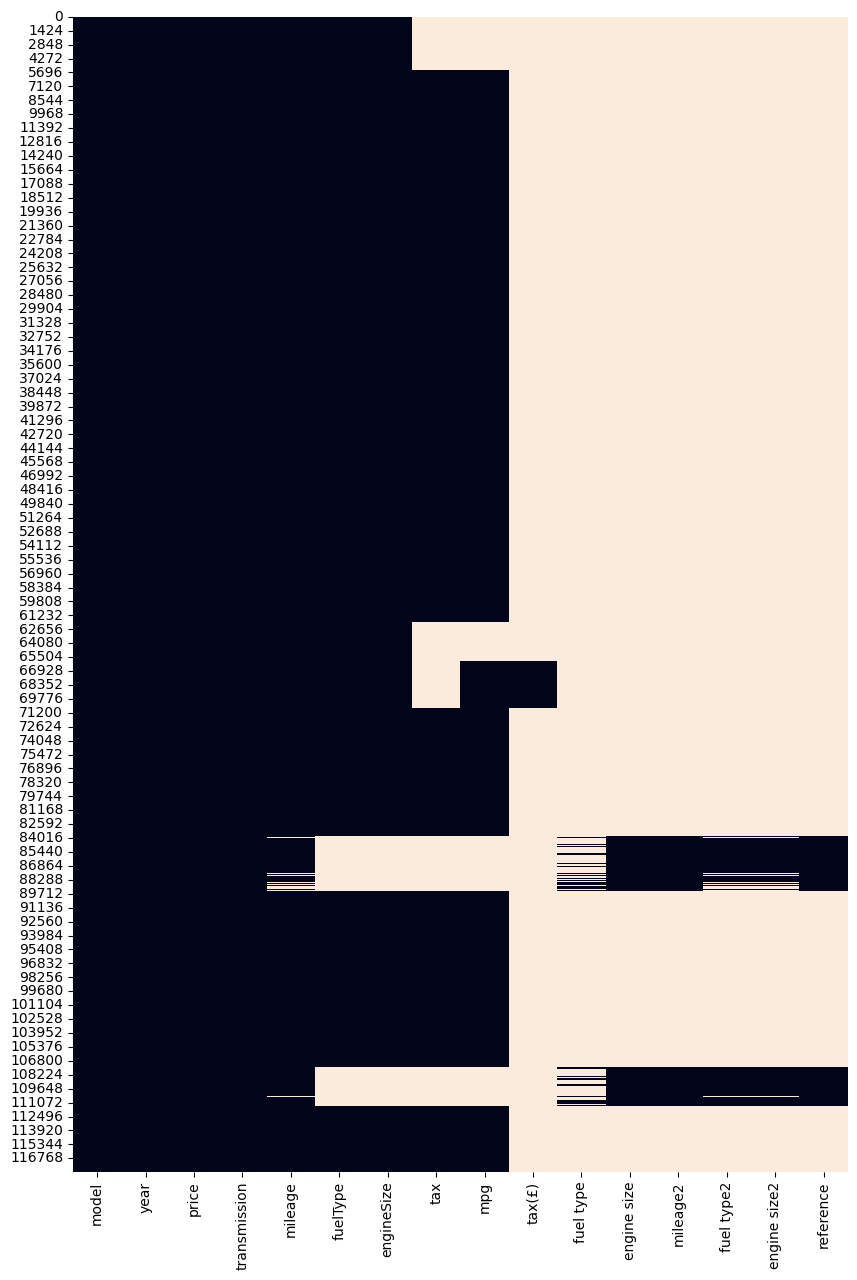

In [ ]:
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)

,index,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
5454,5454,A1,2017.0,12500,Manual,15735,Petrol,1.4,150.0,55.4
5455,5455,A6,2016.0,16500,Automatic,36203,Diesel,2.0,20.0,64.2
5456,5456,A1,2016.0,11000,Manual,29946,Petrol,1.4,30.0,55.4
5457,5457,A4,2017.0,16800,Automatic,25952,Diesel,2.0,145.0,67.3
5458,5458,A3,2019.0,17300,Manual,1998,Petrol,1.0,145.0,49.6
...,...,...,...,...,...,...,...,...,...,...
118145,118145,IQ,2011.0,5500,Automatic,30000,Petrol,1.0,20.0,58.9
118146,118146,Urban Cruiser,2011.0,4985,Manual,36154,Petrol,1.3,125.0,50.4
118147,118147,Urban Cruiser,2012.0,4995,Manual,46000,Diesel,1.4,125.0,57.6
118148,118148,Urban Cruiser,2011.0,3995,Manual,60700,Petrol,1.3,125.0,50.4


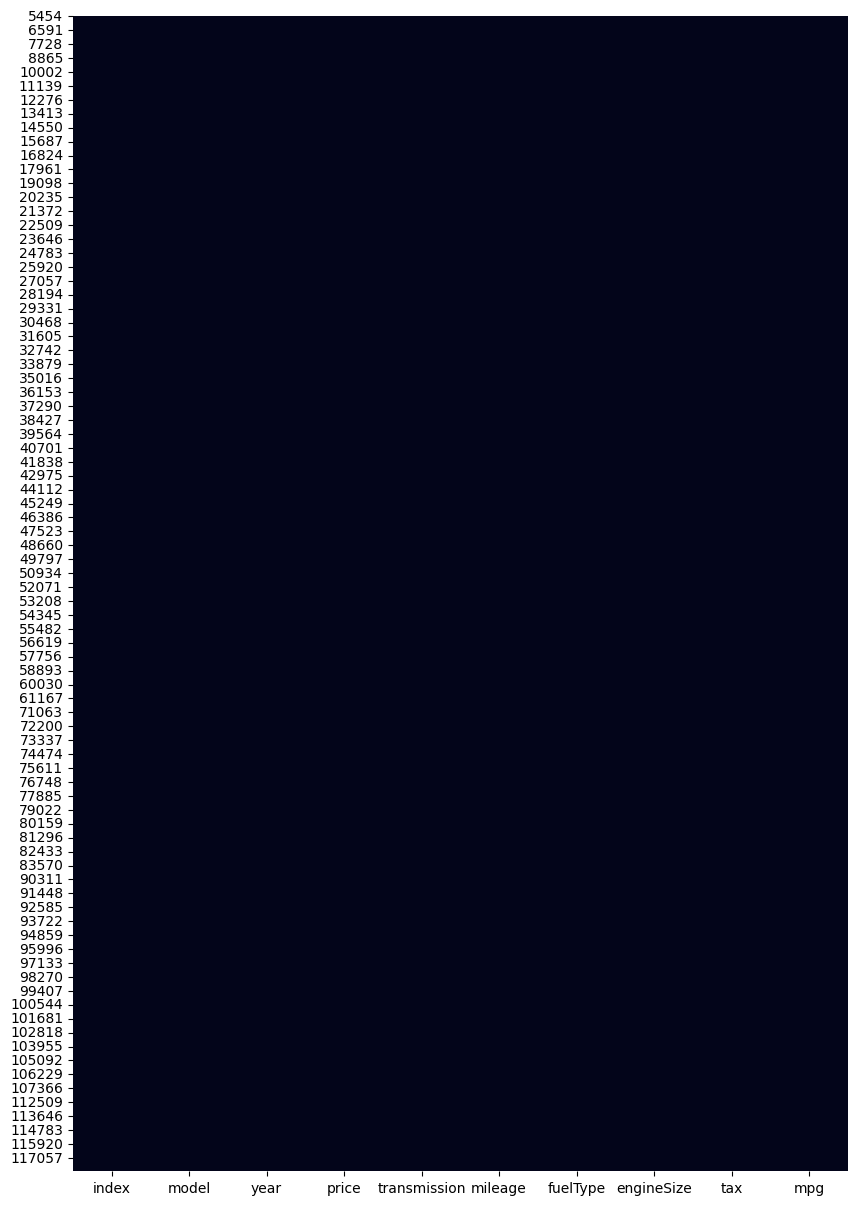

In [ ]:
df.drop(columns = df.columns[9:], inplace=True)
df.reset_index(inplace=True)
df.dropna(inplace=True)

figure(figsize = (10, 15))
sns.heatmap(df.isnull(), cbar=False)
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94327 entries, 5454 to 118149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         94327 non-null  int64  
 1   model         94327 non-null  object 
 2   year          94327 non-null  float64
 3   price         94327 non-null  object 
 4   transmission  94327 non-null  object 
 5   mileage       94327 non-null  object 
 6   fuelType      94327 non-null  object 
 7   engineSize    94327 non-null  float64
 8   tax           94327 non-null  float64
 9   mpg           94327 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.9+ MB


In [ ]:
df.describe()

,index,year,engineSize,tax,mpg
count,94327.000000,94327.000000,94327.000000,94327.000000,94327.000000
mean,57882.840512,2017.086698,1.673861,120.256183,55.235816
std,33369.233643,2.133897,0.562523,63.404805,16.291667
min,5454.000000,1970.000000,0.000000,0.000000,0.300000
25%,29035.500000,2016.000000,1.300000,125.000000,47.100000
50%,52617.000000,2017.000000,1.600000,145.000000,54.300000
75%,90561.500000,2019.000000,2.000000,145.000000,62.800000
max,118149.000000,2060.000000,6.600000,580.000000,470.800000


In [ ]:
df.isnull().sum()

index           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
engineSize      0
tax             0
mpg             0
dtype: int64

In [ ]:
del df['index']

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'engineSize'}>],
       [<Axes: title={'center': 'tax'}>, <Axes: title={'center': 'mpg'}>]],
      dtype=object)

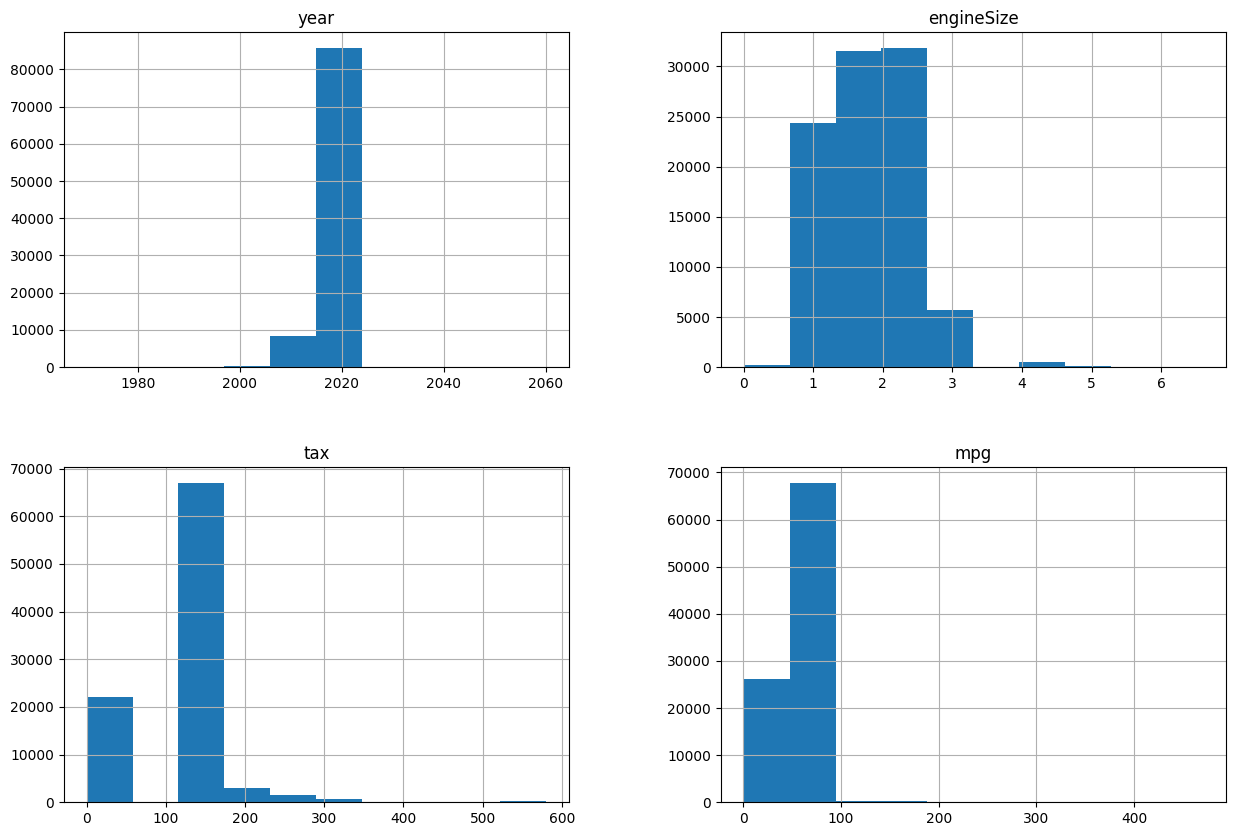

In [ ]:
df.hist(figsize=(15, 10))

In [ ]:
df['model'] = df['model'].apply(lambda x: x.strip())

In [ ]:
df['model'].value_counts()

Fiesta     6557
Golf       4863
Focus      4588
C Class    3747
Corsa      3441
           ... 
A2            1
Ranger        1
180           1
230           1
200           1
Name: model, Length: 179, dtype: int64

In [ ]:
df.year.describe()

count    94327.000000
mean      2017.086698
std          2.133897
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [ ]:
df[df['year'] >= 2021]

,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
107167,Fiesta,2060.0,6495,Automatic,54807,Petrol,1.4,205.0,42.8


In [ ]:
df = df[df['year'] < 2021]
df

,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
5454,A1,2017.0,12500,Manual,15735,Petrol,1.4,150.0,55.4
5455,A6,2016.0,16500,Automatic,36203,Diesel,2.0,20.0,64.2
5456,A1,2016.0,11000,Manual,29946,Petrol,1.4,30.0,55.4
5457,A4,2017.0,16800,Automatic,25952,Diesel,2.0,145.0,67.3
5458,A3,2019.0,17300,Manual,1998,Petrol,1.0,145.0,49.6
...,...,...,...,...,...,...,...,...,...
118145,IQ,2011.0,5500,Automatic,30000,Petrol,1.0,20.0,58.9
118146,Urban Cruiser,2011.0,4985,Manual,36154,Petrol,1.3,125.0,50.4
118147,Urban Cruiser,2012.0,4995,Manual,46000,Diesel,1.4,125.0,57.6
118148,Urban Cruiser,2011.0,3995,Manual,60700,Petrol,1.3,125.0,50.4


In [ ]:
df.describe()

,year,engineSize,tax,mpg
count,94326.000000,94326.000000,94326.000000,94326.000000
mean,2017.086243,1.673864,120.255285,55.235948
std,2.129329,0.562525,63.404540,16.291703
min,1970.000000,0.000000,0.000000,0.300000
25%,2016.000000,1.300000,125.000000,47.100000
50%,2017.000000,1.600000,145.000000,54.300000
75%,2019.000000,2.000000,145.000000,62.800000
max,2020.000000,6.600000,580.000000,470.800000


Перекодировка позволит модели упростить обработку

In [ ]:
df['price'] = df['price'].astype('int')
df['year'] = df['year'].astype('object')
df['mpg'] = df['mpg'].astype('int')
df['mileage'] = df['mileage'].astype('int')

<ipython-input-18-ecef95d5955e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('int')
<ipython-input-18-ecef95d5955e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('object')
<ipython-input-18-ecef95d5955e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

# Кодировка

Рассмотрим 2 основных подхода к кодировке, выберем лучший по метрикам качества в алгоритмах

In [ ]:
from pandas.core.arrays import numeric
from sklearn.pipeline import make_pipeline # конвейер подготовки данных
from sklearn.pipeline import Pipeline # конвер алгоритмов
from sklearn.impute import SimpleImputer # пропуски заполняются медианными значениями
from sklearn.preprocessing import OneHotEncoder, StandardScaler # onehot encoding и стандартизации
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# конвейер подготовки данных числового типа
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),
                                    StandardScaler())

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['price']), df['price'], test_size=0.33, random_state=42)

numeric_features = df.select_dtypes(include = np.number)
categorical_features = df.select_dtypes(exclude = np.number)

# конвейер подготовки данных категориального типа
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_features),
        (
            'cat',
            OneHotEncoder(handle_unknown='ignore', sparse=False),
            categorical_features
        )
    ],
    verbose_feature_names_out = False,
)

# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor), # подготовка
    ('alg', RandomForestRegressor()) # алгоритм
])

# обучение алгоритма
alg.fit(X_train, y_train)

ValueError: ignored

## Label encoder

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            print(column)
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

# используем все, кроме описания
encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки
encoded_data

model
year
transmission
fuelType


<ipython-input-20-d4ad2cfd1527>:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
<ipython-input-20-d4ad2cfd1527>:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
<ipython-input-20-d4ad2cfd1527>:10: DeprecationWarning: `np.object` 

,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
5454,13,22,12500,1,15735,4,1.4,150.0,55
5455,18,21,16500,0,36203,0,2.0,20.0,64
5456,13,21,11000,1,29946,4,1.4,30.0,55
5457,16,22,16800,0,25952,0,2.0,145.0,67
5458,15,24,17300,1,1998,4,1.0,145.0,49
...,...,...,...,...,...,...,...,...,...
118145,82,16,5500,0,30000,4,1.0,20.0,58
118146,155,16,4985,1,36154,4,1.3,125.0,50
118147,155,17,4995,1,46000,0,1.4,125.0,57
118148,155,16,3995,1,60700,4,1.3,125.0,50


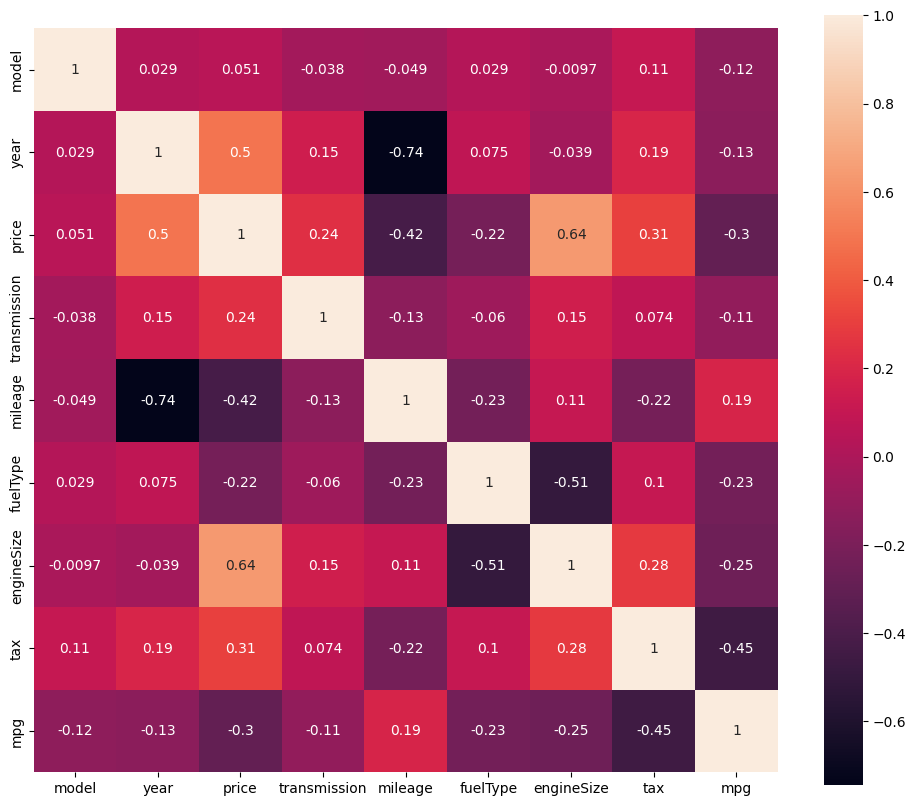

In [ ]:
plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), square = True, annot=True)
plt.show()

Видим, что присутсвуют линейные корреляции, неплохой результат выдадут даже самые простые модели.

## One-hot

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize', 'tax', 'mpg'],
      dtype='object')

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,A1,2017.0,12500,Manual,15735,Petrol,1.4,150.0,55
1,A6,2016.0,16500,Automatic,36203,Diesel,2.0,20.0,64
2,A1,2016.0,11000,Manual,29946,Petrol,1.4,30.0,55
3,A4,2017.0,16800,Automatic,25952,Diesel,2.0,145.0,67
4,A3,2019.0,17300,Manual,1998,Petrol,1.0,145.0,49
...,...,...,...,...,...,...,...,...,...
94321,IQ,2011.0,5500,Automatic,30000,Petrol,1.0,20.0,58
94322,Urban Cruiser,2011.0,4985,Manual,36154,Petrol,1.3,125.0,50
94323,Urban Cruiser,2012.0,4995,Manual,46000,Diesel,1.4,125.0,57
94324,Urban Cruiser,2011.0,3995,Manual,60700,Petrol,1.3,125.0,50


In [ ]:
# data_onehot = pd.get_dummies(df, columns=['model', 'transmission','fuelType'])

from sklearn.preprocessing import OneHotEncoder
# выделяем в DataFrame категориальные колонки (тип - object)
# df.select_dtypes(include=[pd.categorical, pd.object])
categor = df[['model', 'transmission','fuelType', 'year']]

# в случае, если появляется неизвестных новых - игнорируем
enc = OneHotEncoder(handle_unknown='ignore')
# выбираем какие на основе каких признаков производить преобразования
enc.fit(categor)
# производим преобразования категориальных
codes = enc.transform(categor).toarray()
# выделим названия категориальных колонок из тех, на основе которых преобразуем
feature_names = enc.get_feature_names_out(categor.columns)
# объединяем числовые и категориальные колонки

data_onehot = pd.concat([df[['price', 'mileage', 'tax', 'mpg', 'engineSize']], # исключаем категориальные = выбираем цифровые
                        pd.DataFrame(codes,columns=feature_names)], axis = 1) # выбираем закодированные

In [ ]:
enc.categories_

[array(['1 Series', '180', '2 Series', '200', '220', '230', '3 Series',
        '4 Series', '5 Series', '6 Series', '7 Series', '8 Series',
        'A Class', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Adam',
        'Agila', 'Amarok', 'Ampera', 'Antara', 'Arteon', 'Astra', 'Auris',
        'Avensis', 'Aygo', 'B Class', 'B-MAX', 'Beetle', 'C Class', 'C-HR',
        'C-MAX', 'CC', 'CL Class', 'CLA Class', 'CLC Class', 'CLK',
        'CLS Class', 'Caddy', 'Caddy Life', 'Caddy Maxi',
        'Caddy Maxi Life', 'California', 'Camry', 'Caravelle', 'Cascada',
        'Citigo', 'Combo Life', 'Corolla', 'Corsa', 'Crossland X',
        'E Class', 'EcoSport', 'Edge', 'Eos', 'Escort', 'Fabia', 'Fiesta',
        'Focus', 'Fox', 'Fusion', 'G Class', 'GL Class', 'GLA Class',
        'GLB Class', 'GLC Class', 'GLE Class', 'GLS Class', 'GT86', 'GTC',
        'Galaxy', 'Golf', 'Golf SV', 'Grand C-MAX',
        'Grand Tourneo Connect', 'Grandland X', 'Hilux', 'IQ', 'Insignia',
        'Jetta', 'KA

In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,12500,15735,150.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16500,36203,20.0,64,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,11000,29946,30.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16800,25952,145.0,67,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17300,1998,145.0,49,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,5500,30000,20.0,58,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94322,4985,36154,125.0,50,1.3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,4995,46000,125.0,57,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,3995,60700,125.0,50,1.3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_onehot.isna().sum()

price          0
mileage        0
tax            0
mpg            0
engineSize     0
              ..
year_2016.0    0
year_2017.0    0
year_2018.0    0
year_2019.0    0
year_2020.0    0
Length: 219, dtype: int64

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(
#     [('one_hot_encoder', OneHotEncoder(categories='auto', sparse=False), [0, 1, 2, 4])],
#     remainder='passthrough'
# )

# X = ct.fit_transform(df.drop(columns=['price']).values )

# # enc.get_feature_names()
# X

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# ct.get_feature_names()

NotImplementedError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94326 entries, 0 to 94325
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94326 non-null  object 
 1   year          94326 non-null  object 
 2   price         94326 non-null  int64  
 3   transmission  94326 non-null  object 
 4   mileage       94326 non-null  int64  
 5   fuelType      94326 non-null  object 
 6   engineSize    94326 non-null  float64
 7   tax           94326 non-null  float64
 8   mpg           94326 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.5+ MB


In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,12500,15735,150.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16500,36203,20.0,64,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,11000,29946,30.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16800,25952,145.0,67,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17300,1998,145.0,49,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,5500,30000,20.0,58,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94322,4985,36154,125.0,50,1.3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,4995,46000,125.0,57,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,3995,60700,125.0,50,1.3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(94326, 9)

In [ ]:
data_onehot.reset_index(inplace=True, drop=True)
data_onehot.shape

(94326, 219)

In [ ]:
data_onehot.head()

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,12500,15735,150.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16500,36203,20.0,64,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,11000,29946,30.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,16800,25952,145.0,67,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,17300,1998,145.0,49,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# del data_onehot['index']

In [ ]:
# названия признаков - запомним, понадобится при оценки важности признаков
one_hot_feature_names = data_onehot.columns.values
one_hot_feature_names

array(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_1 Series',
       'model_180', 'model_2 Series', 'model_200', 'model_220',
       'model_230', 'model_3 Series', 'model_4 Series', 'model_5 Series',
       'model_6 Series', 'model_7 Series', 'model_8 Series',
       'model_A Class', 'model_A1', 'model_A2', 'model_A3', 'model_A4',
       'model_A5', 'model_A6', 'model_A7', 'model_A8', 'model_Adam',
       'model_Agila', 'model_Amarok', 'model_Ampera', 'model_Antara',
       'model_Arteon', 'model_Astra', 'model_Auris', 'model_Avensis',
       'model_Aygo', 'model_B Class', 'model_B-MAX', 'model_Beetle',
       'model_C Class', 'model_C-HR', 'model_C-MAX', 'model_CC',
       'model_CL Class', 'model_CLA Class', 'model_CLC Class',
       'model_CLK', 'model_CLS Class', 'model_Caddy', 'model_Caddy Life',
       'model_Caddy Maxi', 'model_Caddy Maxi Life', 'model_California',
       'model_Camry', 'model_Caravelle', 'model_Cascada', 'model_Citigo',
       'model_Combo Life', 'mo

## Train-test split

Разделим на треин-тест для обоих методов кодировки

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_onehot.drop(columns=['price']), data_onehot['price'], test_size=0.2)

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(encoded_data.drop(['price'], axis=1), encoded_data['price'], test_size=0.2)

# Алгоритмы

## Linear model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_, y_train_)

from sklearn import metrics
preds = regressor.predict(X_test_)

print(metrics.r2_score(y_test_, preds))

0.7144920628148168


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

from sklearn import metrics
preds = regressor.predict(X_test)

print(metrics.r2_score(y_test, preds))

0.8727320340502169


## Ridge

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
?Ridge

In [ ]:
from sklearn.linear_model import Ridge, ElasticNet

ridge = Ridge(alpha=1)

ridge.fit(X_train_, y_train_)

metrics.r2_score(y_test_, ridge.predict(X_test_))

0.7144930209992577

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('ridge', Ridge())])

pipe.fit(X_train_, y_train_)

metrics.r2_score(y_test_, pipe.predict(X_test_))

0.7144922980263597

## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('ridge', SVR())])

pipe.fit(X_train_, y_train_)

metrics.r2_score(y_test_, pipe.predict(X_test_))

0.298441079094943

## Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 10)],
              'max_features': [2, X_train_.values.shape[0]-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train_.values, y_train_.values)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 208 candidates, totalling 1040 fits


({'max_depth': 14, 'max_features': 75459, 'min_samples_split': 4},
 0.9260208407845874)

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=14, max_features=75459, min_samples_split=4)

In [ ]:
metrics.r2_score(y_test_, gs.predict(X_test_))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


0.9317887698212491

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=14, max_features=75459, min_samples_split=4)

In [ ]:
encoded_data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize', 'tax', 'mpg'],
      dtype='object')

[Text(0.5, 0.9, 'fuelType <= 1.95\nsquared_error = 100258243.984\nsamples = 75460\nvalue = 17024.101'),
 Text(0.25, 0.7, 'year <= 23.5\nsquared_error = 29063313.927\nsamples = 44865\nvalue = 12698.886'),
 Text(0.125, 0.5, 'year <= 20.5\nsquared_error = 14723435.61\nsamples = 32025\nvalue = 10712.75'),
 Text(0.0625, 0.3, 'year <= 17.5\nsquared_error = 8423823.943\nsamples = 7045\nvalue = 7594.236'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'fuelType <= 1.35\nsquared_error = 12983831.009\nsamples = 24980\nvalue = 11592.25'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'fuelType <= 1.45\nsquared_error = 30450918.506\nsamples = 12840\nvalue = 17652.625'),
 Text(0.3125, 0.3, 'model <= 19.0\nsquared_error = 21522431.077\nsamples = 7044\nvalue = 15130.281'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'tax <= 46.5\nsquared_error = 24172737.

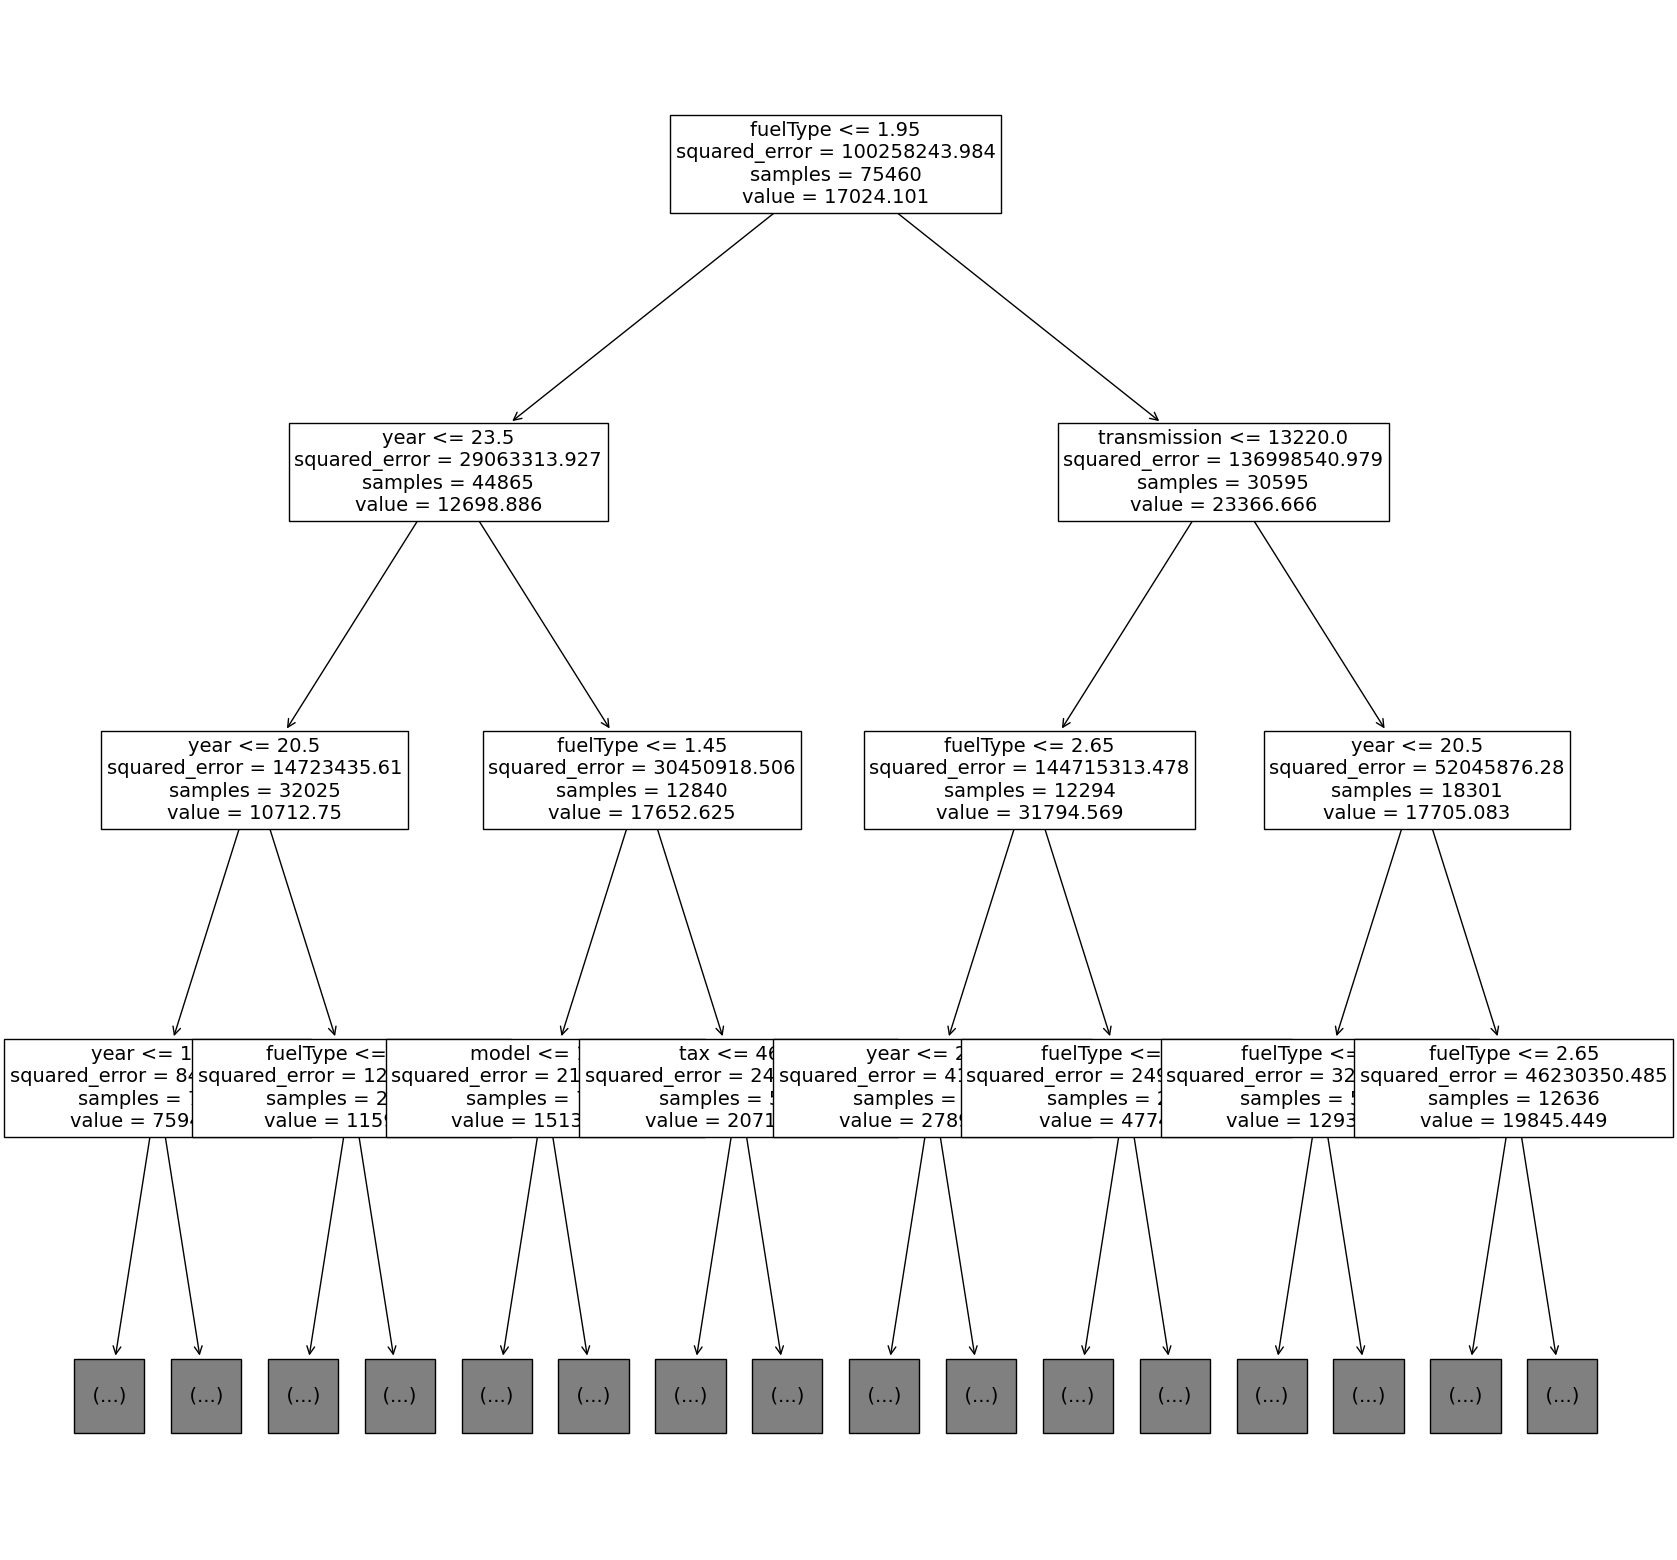

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(gs.best_estimator_, max_depth=3, fontsize=14, feature_names=encoded_data.columns)

## Decision Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()#criterion='entropy')
rf.fit(X_train_, y_train_)

metrics.r2_score(y_test_, rf.predict(X_test_))

0.9604278960023127

In [ ]:
metrics.mean_absolute_percentage_error(y_test_, rf.predict(X_test_))

0.07490724952712473

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 1.000e+00, 8.000e+00, 3.000e+00, 7.000e+00, 2.000e+01,
        4.400e+01, 7.000e+01, 1.650e+02, 4.220e+02, 1.491e+03, 6.412e+03,
        7.460e+03, 1.829e+03, 5.240e+02, 2.030e+02, 8.500e+01, 4.200e+01,
        2.100e+01, 1.200e+01, 9.000e+00, 7.000e+00, 4.000e+00, 6.000e+00,
        2.000e+00, 6.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-34153.27  , -32737.8584, -31322.4468, -29907.0352, -28491.6236,
        -27076.212 , -25660.8004, -24245.3888, -22829.9772, -21414.5656,
        -19999.154 , -18583.7424, -17168.3308, -15752.9192, -14337.5076,
        -12922.096 , -11506.6844, -10091.2728,  -8675.8612,  -7260.4496,
         -5845.038 ,  -4429.6264,  -3014.2148,  -1598.8032,   -183.3916,
          1

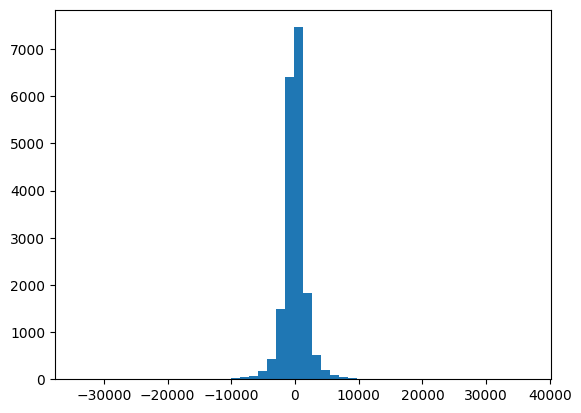

In [ ]:
plt.hist(y_test_ - rf.predict(X_test_), bins=50)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


rf = GradientBoostingRegressor(n_estimators=500)
rf.fit(X_train_, y_train_)

metrics.r2_score(y_test_, rf.predict(X_test_))

0.9416987851118258

In [ ]:
metrics.mean_absolute_percentage_error(y_test_, rf.predict(X_test_))

0.10170648511922427

In [ ]:
from sklearn.model_selection import GridSearchCV

# перебираем глубину
# перебираем мин кол-во для разделения
# максимально кол-во признаков для более случайной выборки
param_grid = {'max_depth': [i for i in range(2, 15)],}
            #   'min_samples_split': [i for i in range(2, 10)],
            #   'max_features': [2, X_train_.values.shape[0]-1]}

# инициализируем случайный лес с перебором по кросс-вал на выбранных выше праметрах
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train_.values, y_train_.values)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 13 candidates, totalling 65 fits


KeyboardInterrupt: ignored

In [ ]:
metrics.r2_score(y_test_, gs.predict(X_test_))

0.9499657897890319

In [ ]:
def plot_feature_importances(gs, column_names, top_n = 15):
    imp = pd.Series(gs.best_estimator_.feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по Giny Impurity')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

In [ ]:
def plot_feature_importances(gs, column_names, top_n = 15):
    imp = pd.Series(gs.feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по MSE')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

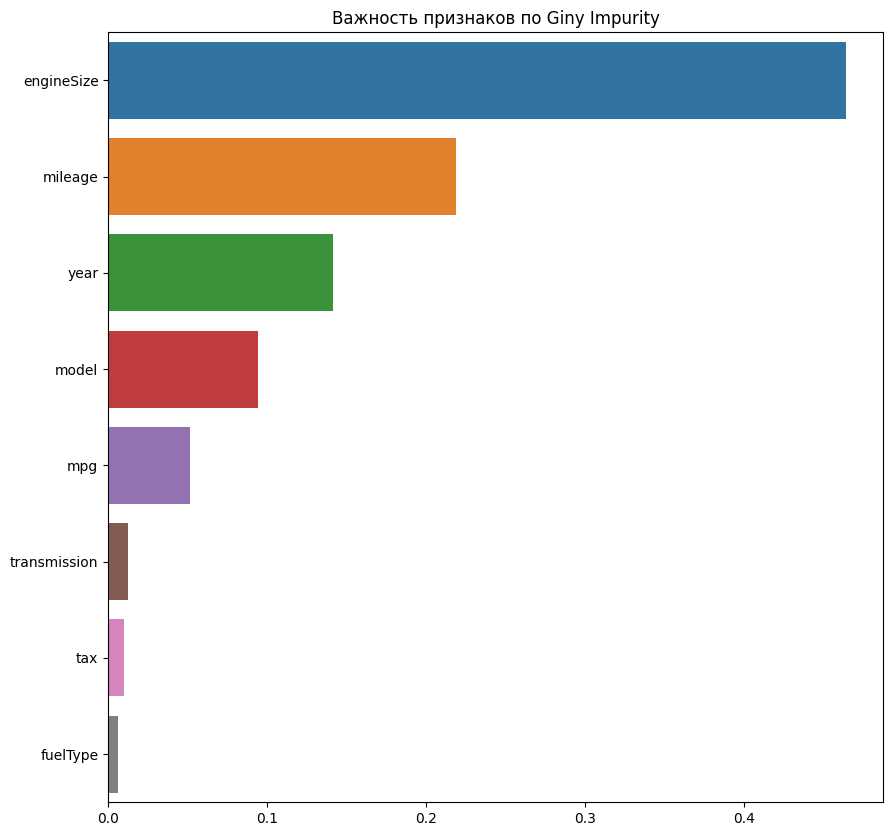

In [ ]:
plot_feature_importances(rf, encoded_data.drop(columns=['price']).columns)

In [ ]:
encoded_data.drop(columns=['price']).columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

# Сравнение разделяющих поверхностей

In [ ]:
#@title Код генерации датасета с занятия
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N * K, dtype='uint8')

    for j in range(K):
        ix = range(N * j,N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
    X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)
    return X, y

In [ ]:
X, y = devil(100)

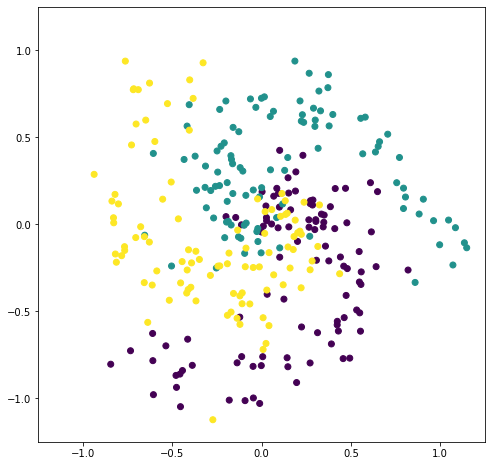

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(X[:,0], X[:,1], c=y)

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = [DecisionTreeClassifier(max_depth=10),
          RandomForestClassifier(max_depth=10)]

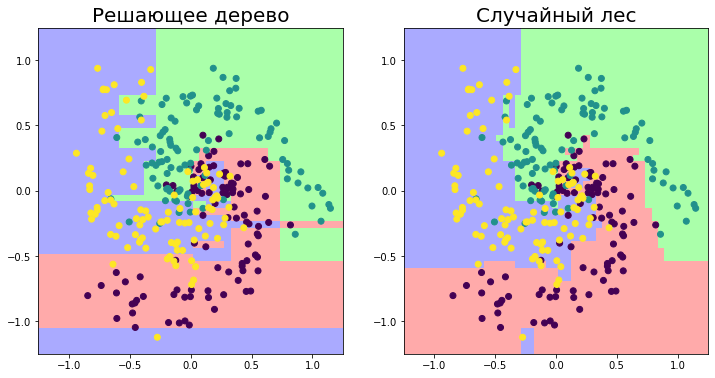

In [ ]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(12,6))
plt.title('Max depth = 7')

name = {0:'Решающее дерево', 1:'Случайный лес'}
for i, model in enumerate(models):
    model.fit(X, y)

    plt.subplot(1, 2, i+1)
    plt.xlim((-1.25, 1.25))
    plt.ylim((-1.25, 1.25))
    xx, yy = np.meshgrid(np.linspace(-1.25, 1.25, 50),
                         np.linspace(-1.25, 1.25, 50))
    plt.gca().set_title(name[i], fontsize=20)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()